In [2]:
import csv

# Specify the filenames for the datasets
enrollments_filename = 'enrollments.csv'
engagement_filename = 'daily_engagement.csv'
submissions_filename = 'project_submissions.csv'

In [3]:
# Read the CSV files and store the data in manageable types
def read_csv(filename):
    with open(filename, 'rt') as f:
        reader = csv.DictReader(f)
        return list(reader)
enrollments = read_csv(enrollments_filename)
daily_engagement = read_csv(engagement_filename)
project_submissions = read_csv(submissions_filename)
print(enrollments[0])
print(daily_engagement[0])
print(project_submissions[0])

{'account_key': '448', 'status': 'canceled', 'join_date': '2014-11-10', 'cancel_date': '2015-01-14', 'days_to_cancel': '65', 'is_udacity': 'True', 'is_canceled': 'True'}
{'acct': '0', 'utc_date': '2015-01-09', 'num_courses_visited': '1.0', 'total_minutes_visited': '11.6793745', 'lessons_completed': '0.0', 'projects_completed': '0.0'}
{'creation_date': '2015-01-14', 'completion_date': '2015-01-16', 'assigned_rating': 'UNGRADED', 'account_key': '256', 'lesson_key': '3176718735', 'processing_state': 'EVALUATED'}


## Fixing data type

In [4]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{'account_key': '448',
 'status': 'canceled',
 'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 'days_to_cancel': 65,
 'is_udacity': True,
 'is_canceled': True}

In [5]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{'acct': '0',
 'utc_date': datetime.datetime(2015, 1, 9, 0, 0),
 'num_courses_visited': 1,
 'total_minutes_visited': 11.6793745,
 'lessons_completed': 0,
 'projects_completed': 0}

In [6]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 'assigned_rating': 'UNGRADED',
 'account_key': '256',
 'lesson_key': '3176718735',
 'processing_state': 'EVALUATED'}

## Problems in the Data

In [7]:
# Rename the "acct" column in the daily_engagement table to "account_key".

for e in daily_engagement:
    # Check to see if the key have been renamed, to prevent Error
    # When running this multiple times
    if 'acct' in e:
        e['account_key'] = e['acct']
        del e['acct']
daily_engagement[0]['account_key']


'0'

## Investigating the data

In [8]:
# Find the total number of rows and the number of unique students (account keys)
# in each table.

#Define a function to gather the account keys into a set  
def get_unique_students(data):
    return (set([e["account_key"] for e in data]))

enrollment_num_rows = len(enrollments)
print(enrollment_num_rows)           
enrollment_num_unique_students = len(get_unique_students(enrollments))
print(enrollment_num_unique_students)  

engagement_num_rows = len(daily_engagement)
print(engagement_num_rows)             
engagement_num_unique_students = len(get_unique_students(daily_engagement))
print(engagement_num_unique_students)

submission_num_rows = len(project_submissions)
print(submission_num_rows)             
submission_num_unique_students = len(get_unique_students(project_submissions))
print(submission_num_unique_students)  

1640
1302
136240
1237
3642
743


## Missing Engagement Records

In [9]:
# Now we have the number of students enrolled is different from the number of students who engaged with the course.
# I will try to find out why this is the case.
for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in get_unique_students(daily_engagement):
        print(enrollment)
        break

{'account_key': '1219', 'status': 'canceled', 'join_date': datetime.datetime(2014, 11, 12, 0, 0), 'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), 'days_to_cancel': 0, 'is_udacity': False, 'is_canceled': True}


In [10]:
# The result from the cell above shows that the student canceled their enrollment on the same day they joined.
# What if there are other suprising cases?
suprising_count = 0
for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in get_unique_students(daily_engagement) \
        and enrollment['join_date'] != enrollment['cancel_date']:
        suprising_count += 1
        print(enrollment)
print(suprising_count)

{'account_key': '1304', 'status': 'canceled', 'join_date': datetime.datetime(2015, 1, 10, 0, 0), 'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), 'days_to_cancel': 59, 'is_udacity': True, 'is_canceled': True}
{'account_key': '1304', 'status': 'canceled', 'join_date': datetime.datetime(2015, 3, 10, 0, 0), 'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), 'days_to_cancel': 99, 'is_udacity': True, 'is_canceled': True}
{'account_key': '1101', 'status': 'current', 'join_date': datetime.datetime(2015, 2, 25, 0, 0), 'cancel_date': None, 'days_to_cancel': None, 'is_udacity': True, 'is_canceled': False}
3


In [11]:
# What was found are the three test accounts that were created by Udacity.
# Indicated by is_udacity = True.
# Here I remove them from the data since I don't plan to include them in any analysis.

is_udacity = set(e['account_key'] for e in enrollments if e['is_udacity'])

In [12]:
# Making new datasets without the Udacity accounts
# In case I want to return to the original datasats

def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in is_udacity:
            non_udacity_data.append(data_point)
    return non_udacity_data

non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print(len(non_udacity_enrollments))
print(len(non_udacity_engagement)) 
print(len(non_udacity_submissions))

1622
135656
3634


## Refining the Question

In [13]:
# The question I wanted to ask:
# How do numbers in the daily engagement table differ for students who pass the
# first project?

# However, there are many problems to this, most notably that this will compare
# data from different lengths of time.

# Therefore, my revision of the question is to only look at engagement from the 
# first week, and exclude students who cancelwithin a week.

# The paid_students variable contains all students who either
# haven't canceled yet or who remained enrolled for more than 7 days. 
# The keys are account keys, and the values are the date the student enrolled.

paid_students = {}
for enrollment in non_udacity_enrollments:
    account_key = enrollment['account_key']
    enrollment_date = enrollment['join_date']
    if enrollment['days_to_cancel'] is None or enrollment['days_to_cancel'] > 7:
        # IMPORTANT:
        # This statement is to check the latest enrollment date for students who
        # Enrolled multiple times
        if (account_key not in paid_students or enrollment_date > paid_students[account_key]):
            paid_students[account_key] = enrollment_date
print(len(paid_students))

995


In [14]:
# The function remove free trial accounts who canceled their enrollment within
# a week.
def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data

In [15]:
# Apply the function to the datasets
paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)
print(len(paid_enrollments))
print(len(paid_engagement))
print(len(paid_submissions))

1293
134549
3618


## Getting Data for the first Week

In [16]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    # Important to check if the time difference is positive
    # As we may include records from previous enrollments of the same student
    return time_delta.days >= 0 and time_delta.days < 7

In [17]:
# This is a list of rows from the engagement table including only rows where
# the student is one of the paid students I just found, and the date is within
# one week of the student's join date.

paid_engagement_in_first_week = []
for engagement_record in paid_engagement:
    account_key = engagement_record['account_key']
    join_date = paid_students[account_key]
    engagement_record_date = engagement_record['utc_date']
        
    if within_one_week(join_date, engagement_record_date):
         paid_engagement_in_first_week.append(engagement_record)
    
len(paid_engagement_in_first_week)

6919

## Exploring the Data of the first week

In [18]:
from collections import defaultdict
# The library allows us to create a dictionary that returns a default value
# if the key is not found.

# This will have a default value of an empty list. Because we want to 
# Get the list of records for each student.
engagement_by_account = defaultdict(list)
for record in paid_engagement_in_first_week:
    account_key = record['account_key']
    # This is where defultdict comes in handy.
    engagement_by_account[account_key].append(record)

In [19]:
# A function to get the total from a given field
# This function will return a dictionary with the account keys as keys
# and the total of the given field as values.
def get_total_from_statistic(field_name, data):
    total_by_account = {}
    for account_key, records in data.items():
        total = 0
        for record in records:
            total += record[field_name]
        total_by_account[account_key] = total
    return total_by_account

In [20]:
import numpy as np
# The libraray to do caclulations on the data 

#A function to print out the information for a given field
def display_statistics(field_values):
    print('Mean:', np.mean(field_values))
    print('Standard Deviation:', np.std(field_values))
    print('Minimum:', np.min(field_values))
    print('Maximum:', np.max(field_values))

In [21]:
# A simple dictionary to hold the total minutes studied in the first week 
# for each account
total_minutes_by_account = get_total_from_statistic('total_minutes_visited', engagement_by_account)
#Get just the values for total minutes, account keys are not needed now
total_minutes = list(total_minutes_by_account.values())
# Display the statistics for total minutes
display_statistics(total_minutes)

# A simple dictionary to hold the lessons completed in the first week
# for each account
total_lessons_by_account = get_total_from_statistic('lessons_completed', engagement_by_account)
# Get the values
total_lessons = list(total_lessons_by_account.values())
# Display the statistics for lessons completed
display_statistics(total_lessons)

Mean: 306.70832675342825
Standard Deviation: 412.99693340852957
Minimum: 0.0
Maximum: 3564.7332644989997
Mean: 1.636180904522613
Standard Deviation: 3.002561299829423
Minimum: 0
Maximum: 36


## Number of visits in the First Week

In [22]:
# There are two ways to do this, either by change the function to also calculate
# The number of days studenst actually visited a course,
# Or by adding a new 'has visited' field to the engagement records.
# I will go with the second option, because it can work with my existing function

# Add a new field to the engagement records to indicate if the student visited
# at least one course on that day.
for record in paid_engagement_in_first_week:
    record['has_visited'] = 1 if (record['num_courses_visited'] > 0) else 0

# A simple dictionary to hold the number of days each student visited at least one
# course in the first week
days_visited_by_account = get_total_from_statistic('has_visited', engagement_by_account)
# Get the values
days_visited = list(days_visited_by_account.values())
# Display the statistics for the number of days visited
display_statistics(days_visited)

Mean: 2.8673366834170855
Standard Deviation: 2.2551980029196814
Minimum: 0
Maximum: 7


## Splitting out passing students

In [23]:
# Create two lists to hold the records of students who passed 
# and those who didn't. The provided project keys are the two
# first projects that are used to grade the students.
subway_project_lesson_keys = ['746169184', '3176718735']

# A set to hold the account keys of students who passed
passing_subway_projects = set()

for record in paid_submissions:
    # Only consider the submissions for the two projects
    if record['lesson_key'] in subway_project_lesson_keys:
        account_key = record['account_key']
        rating = record['assigned_rating']
        if (rating == 'PASSED' or rating == 'DISTINCTION'):
            passing_subway_projects.add(account_key)
len(passing_subway_projects)

647

In [24]:
# Reminder: One student can have multiple engagements in the
# first week, so we consider all the engagements for the student
# who passed or didn't pass the project.
passing_engagement = []
non_passing_engagement = []

for record in paid_engagement_in_first_week:
    account_key = record['account_key']
    if account_key in passing_subway_projects:
        passing_engagement.append(record)
    else:
        non_passing_engagement.append(record)
print(len(passing_engagement))
print(len(non_passing_engagement))

4527
2392


## Comparing the Two Student Groups

In [25]:
# I want to see if there is a difference in different engagement metrics
# between students who passed and those who didn't.
engagement_by_passing_account = defaultdict(list)
engagement_by_non_passing_account = defaultdict(list)

# Generate the dictionaries that hold the engagement by account
for record in passing_engagement:
    account_key = record['account_key']
    engagement_by_passing_account[account_key].append(record)
for record in non_passing_engagement:
    account_key = record['account_key']
    engagement_by_non_passing_account[account_key].append(record)

In [26]:
# Gather the statistics for the number of days visited in both groups

days_visited_by_passing_account = get_total_from_statistic('has_visited', engagement_by_passing_account)
days_visited_passing = list(days_visited_by_passing_account.values())
display_statistics(days_visited_passing)

days_visited_by_non_passing_account = get_total_from_statistic('has_visited', engagement_by_non_passing_account)
days_visited_non_passing = list(days_visited_by_non_passing_account.values())
display_statistics(days_visited_non_passing)

Mean: 3.384853168469861
Standard Deviation: 2.2588214709184595
Minimum: 0
Maximum: 7
Mean: 1.9051724137931034
Standard Deviation: 1.9057314413619046
Minimum: 0
Maximum: 7


In [27]:
# Gather the statistics for the total minutes studied in both groups

total_minutes_by_passing_account = get_total_from_statistic('total_minutes_visited', engagement_by_passing_account)
total_minutes_passing = list(total_minutes_by_passing_account.values())
display_statistics(total_minutes_passing)

total_minutes_by_non_passing_account = get_total_from_statistic('total_minutes_visited', engagement_by_non_passing_account)
total_minutes_non_passing = list(total_minutes_by_non_passing_account.values())
display_statistics(total_minutes_non_passing)

Mean: 394.58604648350865
Standard Deviation: 448.4995193265521
Minimum: 0.0
Maximum: 3564.7332644989997
Mean: 143.32647426675584
Standard Deviation: 269.5386190114951
Minimum: 0.0
Maximum: 1768.5227493319999


In [28]:
# Gather the statistics for the lessons completed in both groups
total_lessons_by_passing_account = get_total_from_statistic('lessons_completed', engagement_by_passing_account)
total_lessons_passing = list(total_lessons_by_passing_account.values())
display_statistics(total_lessons_passing)

total_lessons_by_non_passing_account = get_total_from_statistic('lessons_completed', engagement_by_non_passing_account)
total_lessons_non_passing = list(total_lessons_by_non_passing_account.values())
display_statistics(total_lessons_non_passing)

Mean: 2.052550231839258
Standard Deviation: 3.1422270555779344
Minimum: 0
Maximum: 36
Mean: 0.8620689655172413
Standard Deviation: 2.5491599418312028
Minimum: 0
Maximum: 27


In [ ]:
# My metric to compare the two groups: projects completed besides the subway project.
# I think I did this wrong as I don't consider the case where the student will not
# complete any project other than the subway project.

# TODO: rewrite the code to be more accurate.

other_projects_by_passing_account = defaultdict(int)
other_projects_by_non_passing_account = defaultdict(int)

for passing_submission in paid_submissions:
    # Check to see for projects other than the subway project
    if (passing_submission['lesson_key']) not in subway_project_lesson_keys:
        account_key = passing_submission['account_key']
        # If the student passed that project
        if passing_submission['assigned_rating'] in ['PASSED', 'DISTINCTION']:
            # Add to the respective count
            if account_key in passing_subway_projects:
                other_projects_by_passing_account[account_key] += 1
            else:
                other_projects_by_non_passing_account[account_key] += 1

# Calculate the statistics for other projects completed by two student groups
other_projects_passing = list(other_projects_by_passing_account.values())
other_projects_non_passing = list(other_projects_by_non_passing_account.values())
display_statistics(other_projects_passing)
display_statistics(other_projects_non_passing)
            

Mean: 2.1451612903225805
Standard Deviation: 1.189290574569405
Minimum: 1
Maximum: 7
Mean: 1.3653846153846154
Standard Deviation: 0.4815378471364966
Minimum: 1
Maximum: 2


In [48]:
# Make 6 histograms to visualize the 3 metrics for the two groups.
%matplotlib inline
import matplotlib.pyplot as plt
colors = ['blue', 'purple']
labels = ['Passing', 'Non-Passing']

Text(0.5, 0, 'Days Visited')

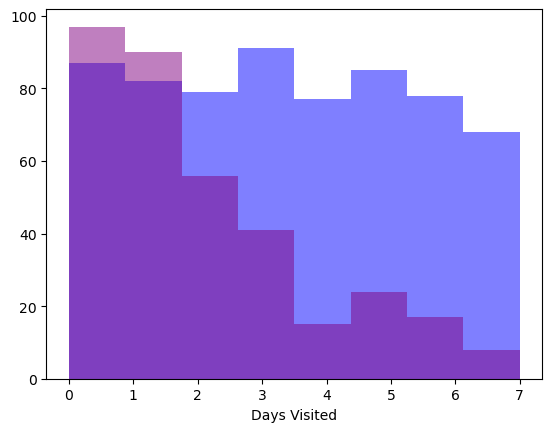

In [74]:
# Histograms for days visited
# I use alpha = 0.5 so when the two histograms overlap eachother
# they will be a bit transparent and both be visible.

plt.hist(days_visited_passing, bins=8, color=colors[0], label=labels[0], alpha=0.5)
plt.hist(days_visited_non_passing, bins=8, color=colors[1], label=labels[1], alpha=0.5)
plt.xlabel('Days Visited')

Text(0.5, 0, 'Total Minutes Studied')

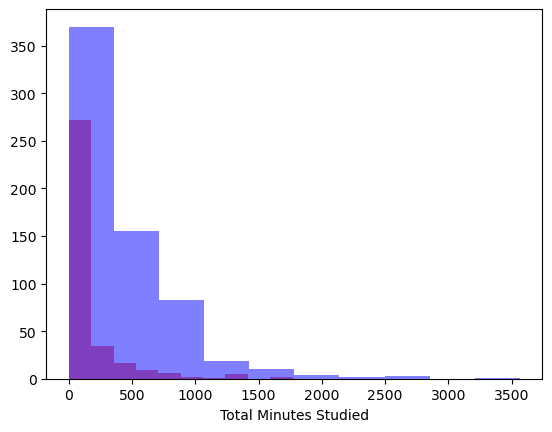

In [68]:
# Histogram for the total minutes studied

plt.hist(total_minutes_passing, color=colors[0], label=labels[0], alpha=0.5)
plt.hist(total_minutes_non_passing, color=colors[1], label=labels[1], alpha=0.5)
plt.xlabel('Total Minutes Studied')

Text(0.5, 0, 'Lessons Completed')

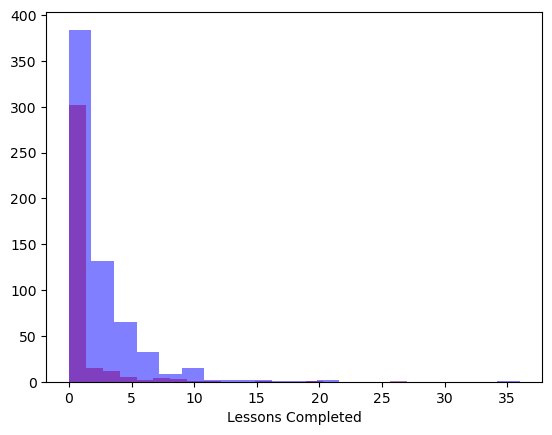

In [ ]:
# Histogram for total lessons completed
plt.hist(total_lessons_passing, color=colors[0], label=labels[0], alpha=0.5)
plt.hist(total_lessons_non_passing, color=colors[1], label=labels[1], alpha=0.5)
plt.xlabel('Lessons Completed')

Text(0.5, 0, 'Other Projects Completed')

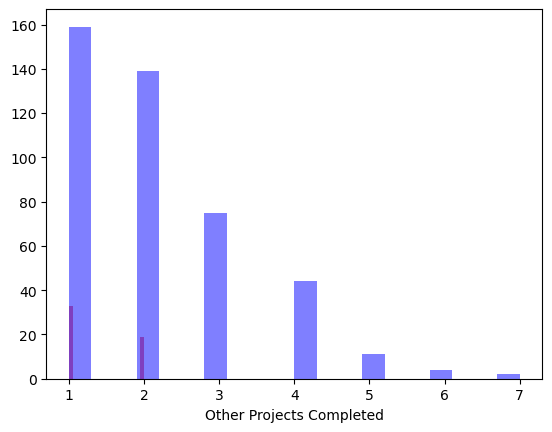

In [73]:
# An extra histogram for the number of other projects completed
# After the subway project
# However, this is only including the projects that were passed
# and does not include that the student may not have completed any other projects.

plt.hist(other_projects_passing, bins=20, color=colors[0], label=labels[0], alpha=0.5)
plt.hist(other_projects_non_passing, bins=20, color=colors[1], label=labels[1], alpha=0.5)
plt.xlabel('Other Projects Completed')